In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Salary_Data.csv')
df.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [4]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


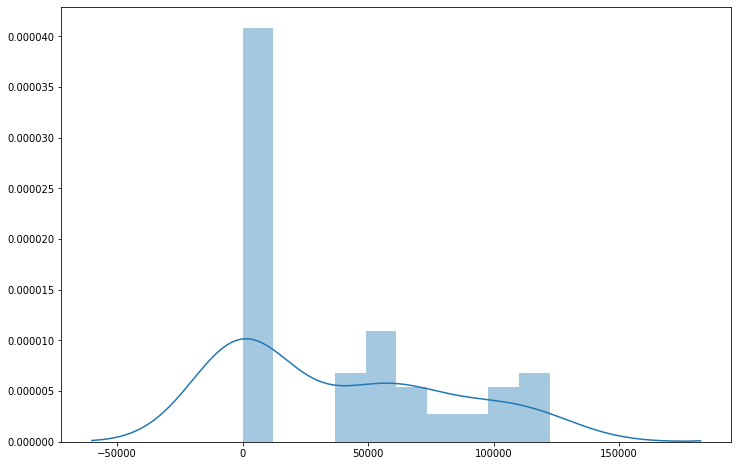

In [5]:
fig = plt.figure(figsize =(12,8))
sns.distplot(df,bins=10)

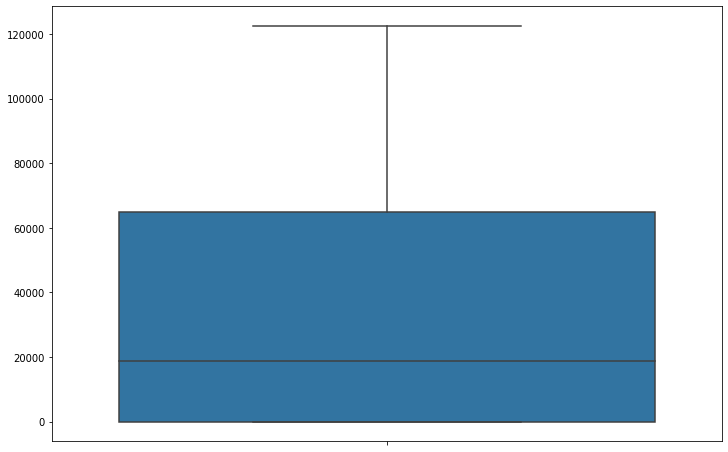

In [6]:
fig = plt.figure(figsize =(12,8))
sns.boxplot(df, orient='v')

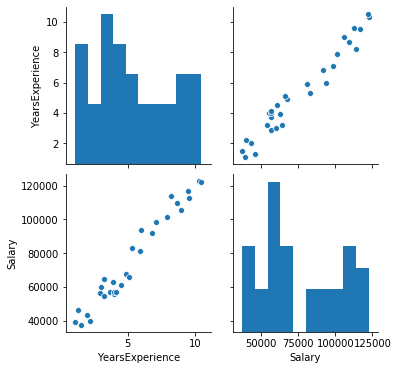

In [7]:
sns.pairplot(df)

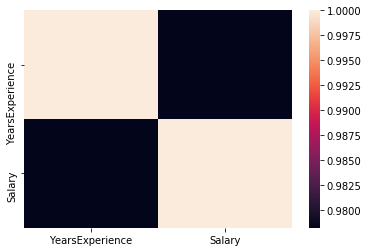

In [8]:
sns.heatmap(df.corr())

In [9]:
## Data tranformation Independeb variable
x = np.array(df['YearsExperience']).reshape(-1,1)
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [10]:
y = np.array(df['Salary']).reshape(-1,1)
y

array([[ 39343.],
       [ 46205.],
       [ 37731.],
       [ 43525.],
       [ 39891.],
       [ 56642.],
       [ 60150.],
       [ 54445.],
       [ 64445.],
       [ 57189.],
       [ 63218.],
       [ 55794.],
       [ 56957.],
       [ 57081.],
       [ 61111.],
       [ 67938.],
       [ 66029.],
       [ 83088.],
       [ 81363.],
       [ 93940.],
       [ 91738.],
       [ 98273.],
       [101302.],
       [113812.],
       [109431.],
       [105582.],
       [116969.],
       [112635.],
       [122391.],
       [121872.]])

In [11]:
##Data scaling ถ้าค่า independent var ห่างจากค่า dependent var มาก ต้องทำให้เป็น standardize (z=(x-u)/standard deviation) เพื่อสามารถเปรียบเทียบทางสถิติได้
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)

In [12]:
x

array([[-1.51005294],
       [-1.43837321],
       [-1.36669348],
       [-1.18749416],
       [-1.11581443],
       [-0.86493538],
       [-0.82909552],
       [-0.75741579],
       [-0.75741579],
       [-0.57821647],
       [-0.50653674],
       [-0.47069688],
       [-0.47069688],
       [-0.43485702],
       [-0.29149756],
       [-0.1481381 ],
       [-0.07645838],
       [-0.00477865],
       [ 0.21026054],
       [ 0.2461004 ],
       [ 0.53281931],
       [ 0.6403389 ],
       [ 0.92705781],
       [ 1.03457741],
       [ 1.21377673],
       [ 1.32129632],
       [ 1.50049564],
       [ 1.5363355 ],
       [ 1.78721455],
       [ 1.85889428]])

In [13]:
y

array([[-1.36011263],
       [-1.10552744],
       [-1.419919  ],
       [-1.20495739],
       [-1.33978143],
       [-0.71830716],
       [-0.58815781],
       [-0.79981746],
       [-0.42881019],
       [-0.69801306],
       [-0.47433279],
       [-0.74976858],
       [-0.70662043],
       [-0.70201994],
       [-0.55250402],
       [-0.29921736],
       [-0.37004264],
       [ 0.26285865],
       [ 0.19885989],
       [ 0.66547573],
       [ 0.58377993],
       [ 0.82623317],
       [ 0.93861127],
       [ 1.40274136],
       [ 1.24020308],
       [ 1.09740238],
       [ 1.51986835],
       [ 1.3590738 ],
       [ 1.72102849],
       [ 1.70177321]])

In [14]:
## การ Train ข้อมูลที่มี data > 1000 ควรมีการ split data
from sklearn.svm import SVR
regressor = SVR(kernel = 'linear')
regressor.fit(x,y)

D:\Program ETC\Jupyter\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [15]:
test = sc_x.transform([[11]]) ## ต้องเอาค่าเเเปลงเป็น standardize เทียบกับเเกน x
result = regressor.predict(test) ## ใส่เป็น array 2 มิติ สำหรับการทดสอบ
result ##ผลที่ได้ก็จะเป็นค่า standardize

array([1.93415054])

In [16]:
sc_y.inverse_transform(result) ## เทียบกับ standardize เเกน y

array([128135.41717593])

In [17]:
sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.1]]))) ## เเบบย่อ

array([82853.58777709])

In [18]:
## ทดสอบ model
predicted = sc_y.inverse_transform(regressor.predict(x))
predicted

array([ 36647.63941094,  38495.87734559,  40344.11528023,  44964.71011685,
        46812.9480515 ,  53281.78082276,  54205.89979008,  56054.13772473,
        56054.13772473,  60674.73256134,  62522.97049599,  63447.08946331,
        63447.08946331,  64371.20843063,  68067.68429993,  71764.16016922,
        73612.39810386,  75460.63603851,  81005.34984245,  81929.46880977,
        89322.42054836,  92094.77745033,  99487.72918891, 102260.08609088,
       106880.68092749, 109653.03782946, 114273.63266608, 115197.7516334 ,
       121666.58440466, 123514.82233931])

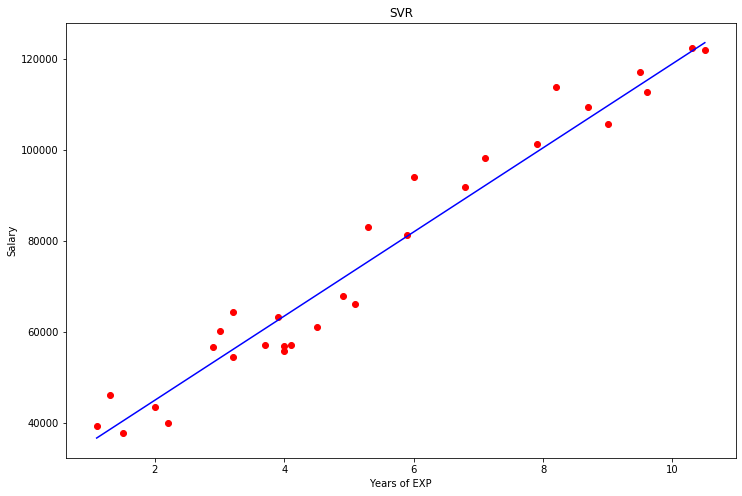

In [19]:
fig = plt.figure(figsize = (12,8))
plt.scatter(sc_x.inverse_transform(x),sc_y.inverse_transform(y),color='red')
plt.plot(sc_x.inverse_transform(x),predicted,color='blue')
plt.title('SVR')
plt.xlabel('Years of EXP')
plt.ylabel('Salary')
plt.show()

In [29]:
from sklearn import metrics
print('MAE',metrics.mean_absolute_error(sc_y.inverse_transform(y),predicted))
print('MSE',metrics.mean_squared_error(sc_y.inverse_transform(y),predicted))
print('RMSE',np.sqrt(metrics.mean_squared_error(sc_y.inverse_transform(y),predicted)))

MAE 4695.54046365217
MSE 31785960.786538515
RMSE 5637.903935554286


In [21]:
## Kernel = 'radail basis function'
regressor_rbf = SVR(kernel = 'rbf')
regressor_rbf.fit(x,y)

D:\Program ETC\Jupyter\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [24]:
predicted_rbf = sc_y.inverse_transform(regressor_rbf.predict(x))
predicted_rbf

array([ 43296.16442868,  43502.718266  ,  43998.28879802,  46225.11502223,
        47386.68192568,  51916.02026083,  52580.73860814,  53915.0561013 ,
        53915.0561013 ,  57368.10532126,  58863.00698958,  59650.28593501,
        59650.28593501,  60469.29008332,  64127.60010341,  68487.23942334,
        70928.37326913,  73518.24037208,  81811.19849278,  83210.33288804,
        93595.16637346,  96888.85481804, 104003.6946568 , 106238.13870622,
       109727.58008953, 111727.14783308, 114787.37007368, 115328.28632694,
       117879.97587636, 118069.6713812 ])

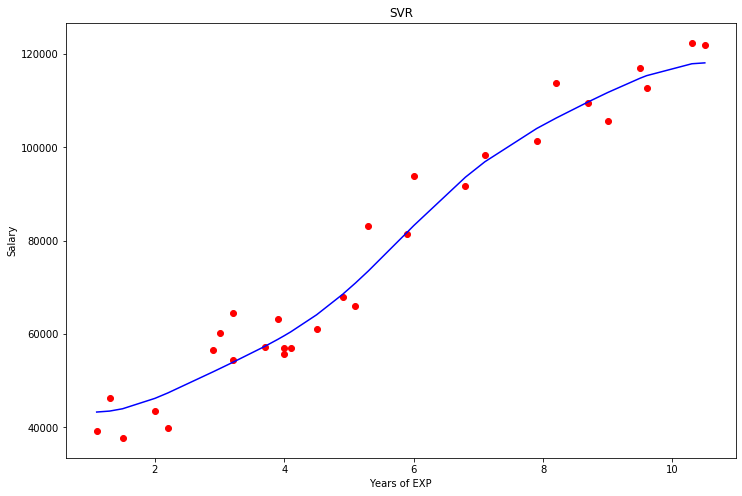

In [26]:
fig = plt.figure(figsize = (12,8))
plt.scatter(sc_x.inverse_transform(x),sc_y.inverse_transform(y),color='red')
plt.plot(sc_x.inverse_transform(x),predicted_rbf,color='blue')
plt.title('SVR')
plt.xlabel('Years of EXP')
plt.ylabel('Salary')
plt.show()

In [30]:
print('MAE',metrics.mean_absolute_error(sc_y.inverse_transform(y),predicted_rbf))
print('MSE',metrics.mean_squared_error(sc_y.inverse_transform(y),predicted_rbf))
print('RMSE',np.sqrt(metrics.mean_squared_error(sc_y.inverse_transform(y),predicted_rbf)))

MAE 4110.177452496835
MSE 25469599.69923072
RMSE 5046.741493204375
